# Visualisation of Diamonds Dataset

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Variable Descriptions
* Carat - weight of the diamond (0.2--5.01)
* Cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* Color - Color of the diamond, with D being the best and J the worst
* Clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth - The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* Table - The width of the diamond's table expressed as a percentage of its average diameter
* Price - the price of the diamond
* x - length mm
* y - width mm
* z - depth mm

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.shape

(53940, 10)

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

### Categorik deyiskenli sutunlarin mueyyen bir sirayla gelmesini temin etmek

In [10]:
from pandas.api.types import CategoricalDtype

In [11]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [12]:
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [13]:
df.cut = df.cut.astype(CategoricalDtype(cut_order , ordered = True))

In [14]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

## Barplot

#### Using Pandas

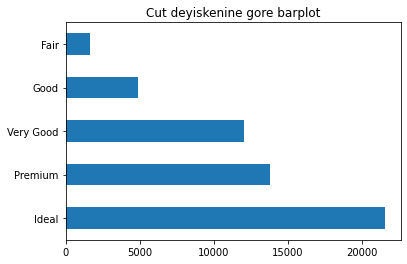

In [15]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut deyiskenine gore barplot")
);

#### Using Seaborn

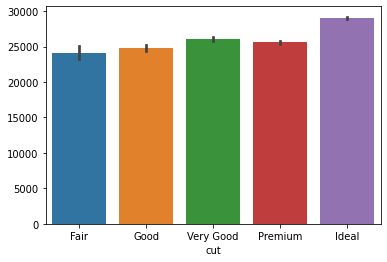

In [16]:
sns.barplot(x = "cut" , y = df.cut.index , data = df);

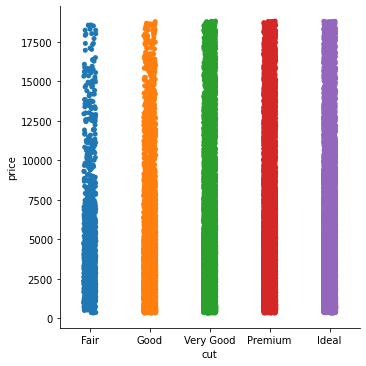

In [17]:
sns.catplot(x="cut", y = "price" , data = df);

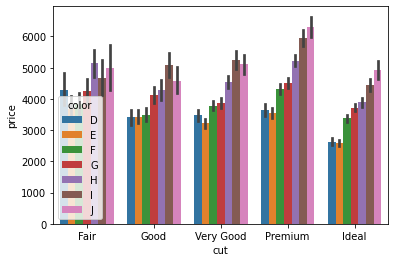

In [18]:
sns.barplot(x="cut", y = "price" , hue = "color" , data = df);

In [19]:
# dogrulugunu yoxlayaq
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
clarity_order = ["I1", "SI2", "SI1", "VS2","VS1","VVS2","VVS1" , "IF"]

In [22]:
df.clarity = df.clarity.astype(CategoricalDtype(clarity_order , ordered = True))

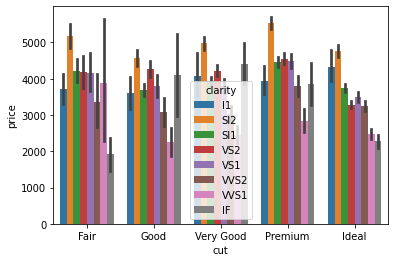

In [23]:
sns.barplot(x= "cut" , y = "price", hue = "clarity" , data = df );

In [24]:
df.groupby(["cut", "clarity"])["price"].mean()

cut        clarity
Fair       I1         3703.533333
           SI2        5173.916309
           SI1        4208.279412
           VS2        4174.724138
           VS1        4165.141176
           VVS2       3349.768116
           VVS1       3871.352941
           IF         1912.333333
Good       I1         3596.635417
           SI2        4580.260870
           SI1        3689.533333
           VS2        4262.236196
           VS1        3801.445988
           VVS2       3079.108392
           VVS1       2254.774194
           IF         4098.323944
Very Good  I1         4078.226190
           SI2        4988.688095
           SI1        3932.391049
           VS2        4215.759552
           VS1        3805.353239
           VVS2       3037.765182
           VVS1       2459.441065
           IF         4396.216418
Premium    I1         3947.331707
           SI2        5545.936928
           SI1        4455.269371
           VS2        4550.331248
           VS1        4485.46

## Histogram And Kernel Density Estimate (KDE) plot

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


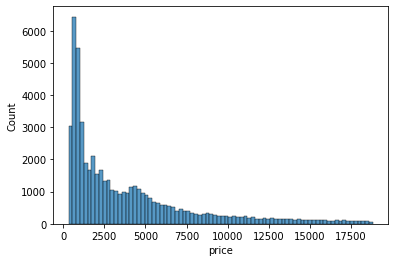

In [32]:
sns.histplot(df.price);

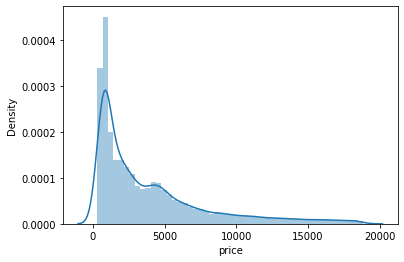

In [27]:
sns.distplot(df.price);

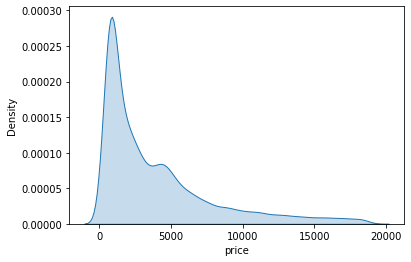

In [28]:
sns.kdeplot(df.price, shade = True );

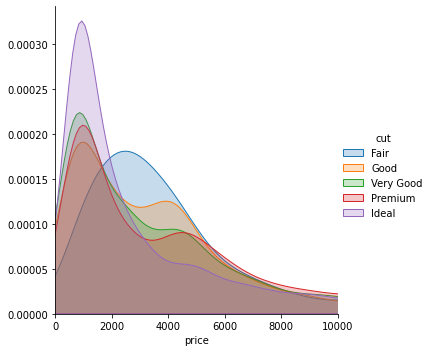

In [29]:
(sns
 .FacetGrid(df,
           hue = "cut",
           height = 5,
           xlim = (0 , 10000))
 .map(sns.kdeplot , "price", shade =True)
 .add_legend()
);

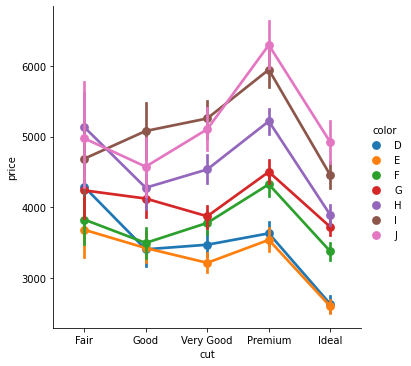

In [30]:
sns.catplot(x = "cut", y = "price" , hue = "color" , kind = "point" , data = df);